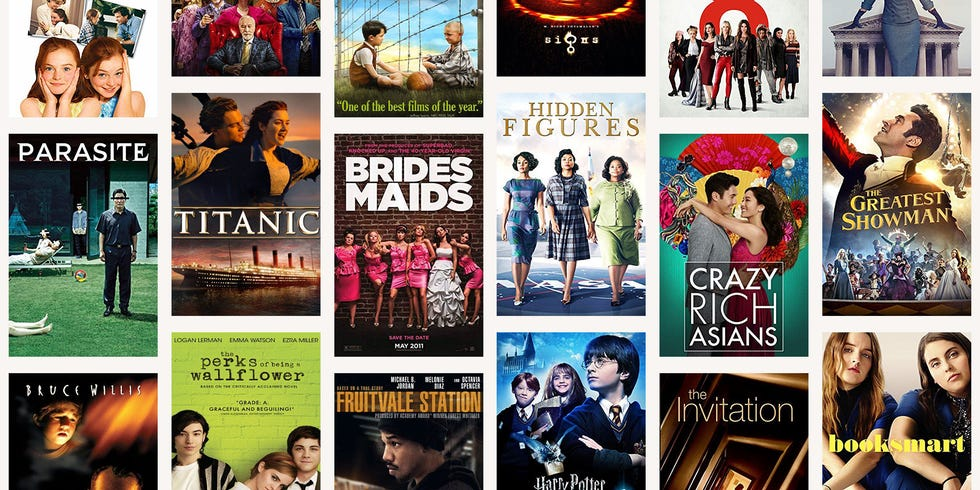

# Finding the Hollywood Formula, Movie Dataset Analysis

**By: Stephen Kipkurui, Ella Xu, Braeden Wright, Nick Dougherty**

***


# Executive Summary


BALABAL

# Project Description

 Using the data available from the Metadata Movie Dataset, our team intends to compare different features of movies made between the year 2000 and present day in an attempt to determine the key features that might predict how successful the movie is(Success being measured by revenue). Once we explore the data, we will look for any trends that show over the past 2 decades that may have affected what makes a movie successful. In those 20 years, streaming has risen in popularity, consumer tastes have changed and even how movies are structured has changed(cinematic universes), all of which may have altered what causes a movie's success. Taking these into account, we can build a model that can predict a movie's success rate , thus giving insight into how to outline movies for maximum success in the theaters.

# Project Goal

We want to determine if there is a "Hollywood formula" to making a successful movie.

# Initial Questions

1. Is there a relationship between budget and revenue?
2. How runtime affect movie success? 
3. What are the top 5 Highest Voted Movies?
4. What are top 5 Highest profit movies?
5. What are top 5 genres....

# Data Collection

We found an interesting dataset of more than 5000 data points consisting of 28 attributes describing IMDB movies here: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset.


We will be focusing our analysis around domestic gross, which is how much the film earned domestically at the box office during its initial run. This figure is in nominal terms, and will need to be transformed into real terms. Also, this figure exlcludes international earnings, as well as revenue from DVD rentals, television runs, etc. We will be focusing our analysis on films produced within the USA only.

# Import Menagerie

In [15]:
# Basics
import pandas as pd
import numpy as np
from scipy import math
from scipy import stats

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# SKLearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Custom
import final_acquire as fa

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Make sure we can see the full scale of the data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Set default graph size
plt.rc('figure', figsize=(13.0, 6.0))
sns.set(rc = {'figure.figsize':(13,6.0)})

# Data Acquisition and Preparation

In [16]:
df = fa.wrangle_df()
df.head()

Using cached CSV


,title,success,success_rating,genres,cast_actor_1,cast_actor_2,cast_actor_3,total_n_cast,budget,revenue,profit_amount,vote_average,vote_count,production_companies,production_countries,overview,popularity,runtime,profitable,release_date,release_year,imdb_id,production_company,is_genre_adventure,is_genre_horror,is_genre_drama,is_genre_scifi,is_genre_romance,is_genre_thriller,is_genre_crime,is_genre_comedy,is_genre_animation,is_genre_action,is_genre_mystery,is_genre_fantasy,is_genre_documentary
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,Four Rooms,0,3.493750,Crime Comedy,Tim Roth,Antonio Banderas,Jennifer Beals,24.0,4000000.0,4300000.0,300000.0,6.5,539.0,MiramaxFilms ABandApart,UnitedStatesofAmerica,It's Ted the Bellhop's first night on the job....,9.026586,98.0,0,1995-12-09,1995,tt0113101,MiramaxFilms,0,0,0,0,0,0,1,1,0,0,0,0,0
6,Judgment Night,0,4.854775,Action Thriller Crime,Emilio Estevez,Cuba Gooding Jr.,Denis Leary,15.0,8000000.0,12136938.0,4136938.0,6.4,79.0,UniversalPictures LargoEntertainment JVCEntert...,Japan UnitedStatesofAmerica,"While racing to a boxing match, Frank, Mike, J...",5.538671,110.0,0,1993-10-15,1993,tt0107286,UniversalPictures,0,0,0,0,0,1,1,0,0,1,0,0,0
11,Star Wars,1,285.487448,Adventure Action Science Fiction,Mark Hamill,Harrison Ford,Carrie Fisher,106.0,11000000.0,775398007.0,764398007.0,8.1,6778.0,Lucasfilm TwentiethCenturyFoxFilmCorporation,UnitedStatesofAmerica,Princess Leia is captured and held hostage by ...,42.149697,121.0,1,1977-05-25,1977,tt0076759,Lucasfilm,1,0,0,1,0,0,0,0,0,1,0,0,0
12,Finding Nemo,1,38.013564,Animation Family,Albert Brooks,Ellen DeGeneres,Alexander Gould,24.0,94000000.0,940335536.0,846335536.0,7.6,6292.0,PixarAnimationStudios,UnitedStatesofAmerica,"Nemo, an adventurous young clownfish, is unexp...",25.497794,100.0,1,2003-05-30,2003,tt0266543,PixarAnimationStudios,0,0,0,0,0,0,0,0,1,0,0,0,0
13,Forrest Gump,1,50.537748,Comedy Drama Romance,Tom Hanks,Robin Wright,Gary Sinise,66.0,55000000.0,677945399.0,622945399.0,8.2,8147.0,ParamountPictures,UnitedStatesofAmerica,A man with a low IQ has accomplished great thi...,48.307194,142.0,1,1994-07-06,1994,tt0109830,ParamountPictures,0,0,1,0,1,0,0,1,0,0,0,0,0


In [17]:
df.shape

(7282, 36)

In [18]:
train, validate, test = fa.train_validate_test_split(df)
train.shape, validate.shape, test.shape

((4077, 36), (1748, 36), (1457, 36))

# Exploration

## What are the distribution for continuous variable? 

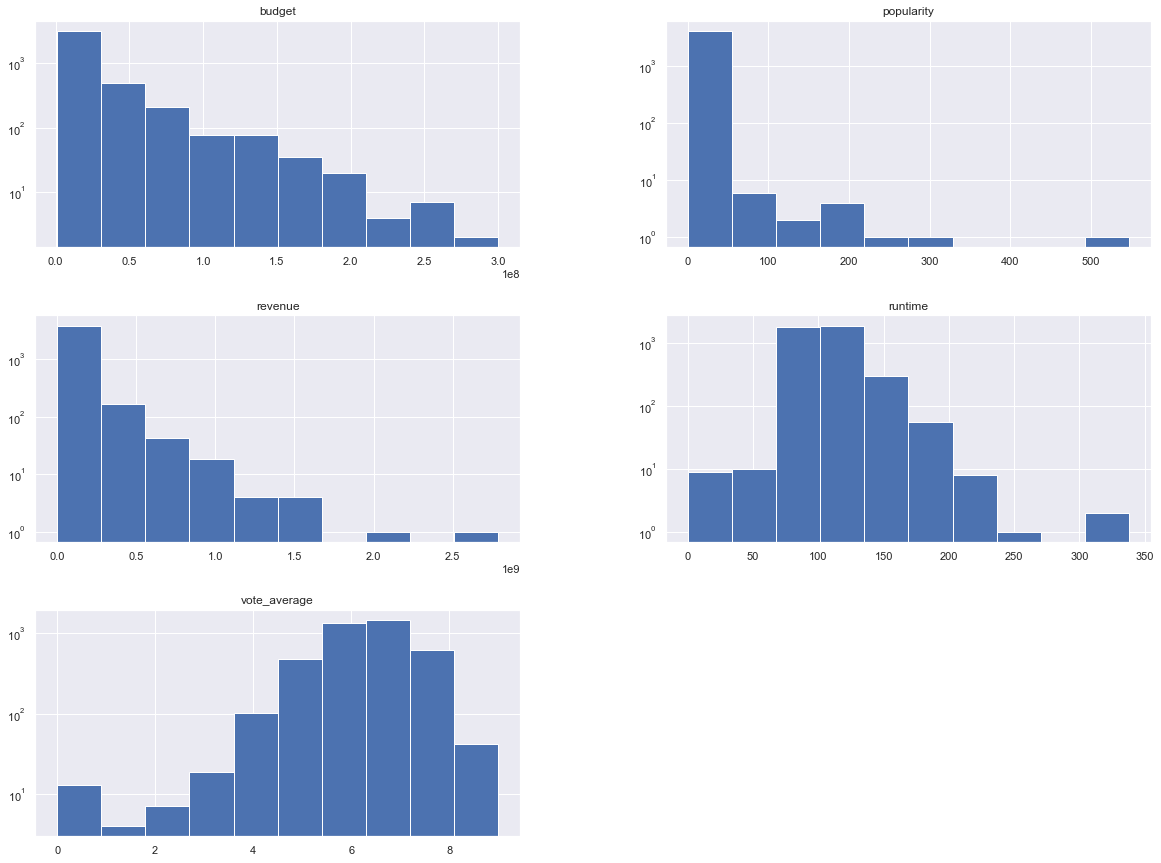

In [19]:
num_features = ['budget', 'popularity', 'revenue', 'runtime']
train[num_features + ['vote_average']].hist(figsize=(20,15), log=True);

## 1.  Is there a relationship between budget and revenue?

In [20]:
import plotly.express as px 
fig = px.scatter(train, x="budget", y="revenue", trendline="ols", title="Relationship between Budget and Revenue")
fig.update_layout(xaxis_title="Budget", 
                 yaxis_title="Revenue")
fig.show()

ModuleNotFoundError: No module named 'plotly'

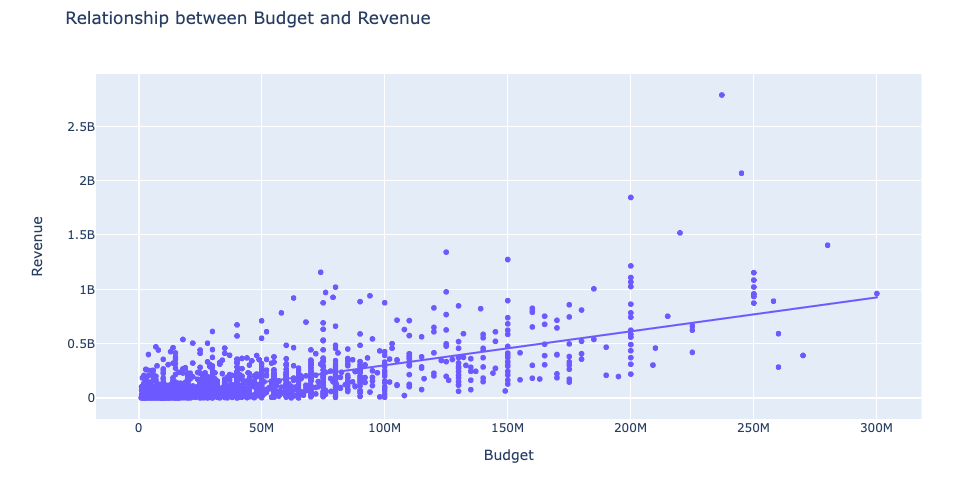

In [21]:
alpha = 0.05
corr, p = stats.pearsonr(train.budget, train.revenue)
corr, p
if p < alpha:
    print("We reject the null hypothesis")

else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


Takeaways: There are some relationship between budget and revenue. 

## 2. Correlation Heatmap of All Features including the target. 

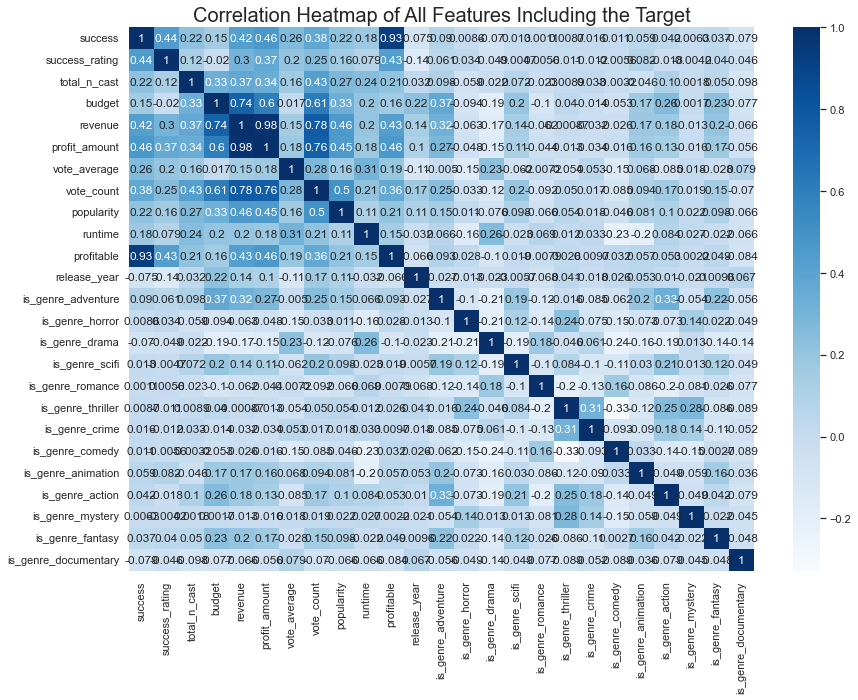

In [22]:
# Heatmap to display correlation of the features and logerror.
plt.figure(figsize=(14, 10))# set up the figure size. 
sns.heatmap(df.corr(), cmap='Blues', annot=True)# set up the heatmap, including color and annot. 
plt.title('Correlation Heatmap of All Features Including the Target', fontsize=20) # set upt the title and front size 
plt.show()

## 3. What are the top 5 Highest Voted Movies?

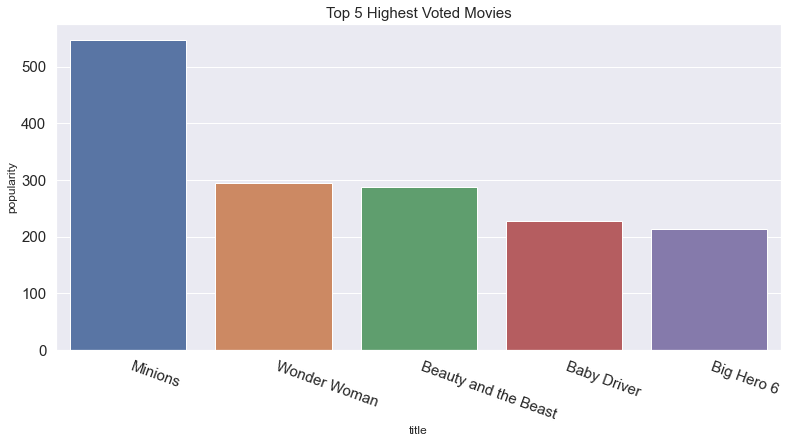

In [23]:
cols = ['title', 'popularity']
popularity_df = df.sort_values('popularity', ascending=False)[cols].set_index('title')
top_5 = popularity_df.head(5)
sns.barplot(data=top_5, x=top_5.index, y='popularity');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.title('Top 5 Highest Voted Movies', fontsize=15);

## 4. Top 5 Highest revenue movies?

Text(0.5, 1.0, 'Top 5 Highest Revenue Movies')

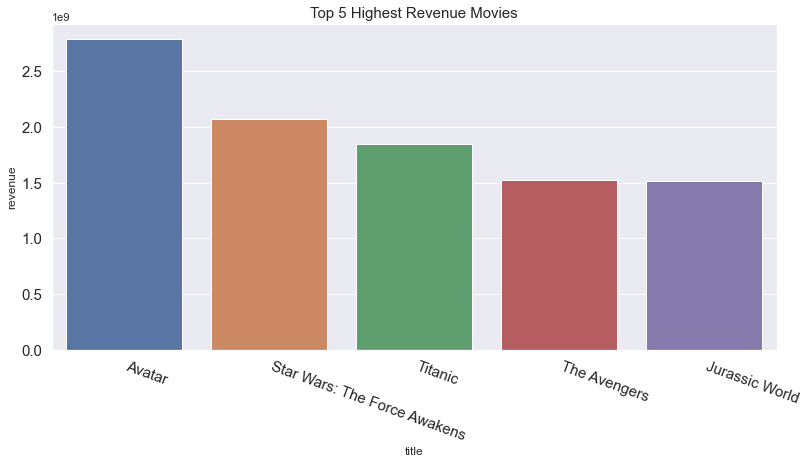

In [24]:
cols = ['title', 'revenue']
revenue_df = df.sort_values('revenue', ascending=False)[cols].set_index('title')
top_5 = revenue_df.head(5)
sns.barplot(data=top_5, x=top_5.index, y='revenue');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.title('Top 5 Highest Revenue Movies', fontsize=15)

## 5. Which top 5 genres have the highest profit?

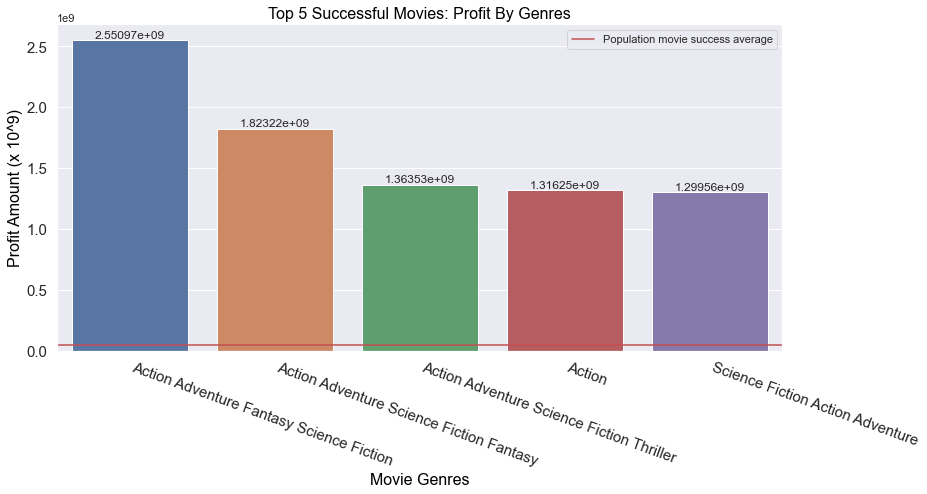

In [40]:
top_5_most_profitable_set = train.nlargest(n = 5, columns = ['profit_amount'])

plt.title('Top 5 Successful Movies: Profit By Genres', c = 'black', size = 16)
ax = sns.barplot(x = 'genres',  y = 'profit_amount', data = top_5_most_profitable_set)
ax.bar_label(ax.containers[0])  
overall_movie_profit_mean = train.profit_amount.mean()
plt.axhline(overall_movie_profit_mean, label="Population movie success average", color = 'r')
plt.ylabel('Profit Amount (x 10^9)', c = 'black', size = 16)
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel('Movie Genres', c = 'black', size = 16)
plt.legend()
plt.show()

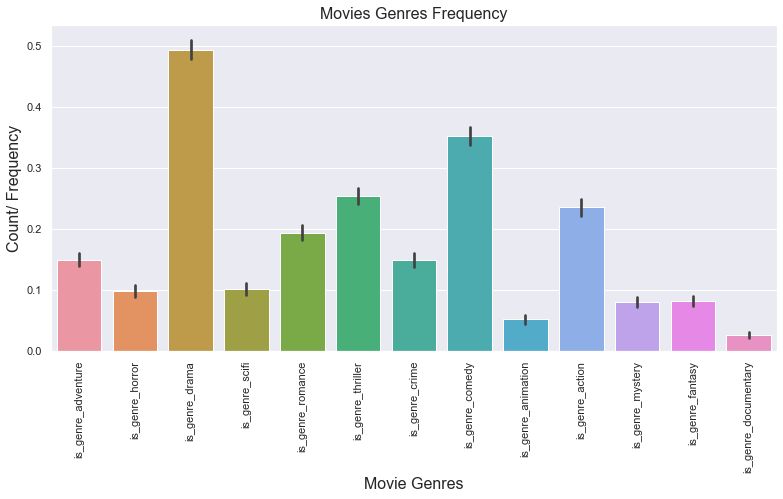

In [61]:
# Movies genres Frequency 

genres_columns = ['is_genre_adventure', 'is_genre_horror',
       'is_genre_drama', 'is_genre_scifi', 'is_genre_romance',
       'is_genre_thriller', 'is_genre_crime', 'is_genre_comedy',
       'is_genre_animation', 'is_genre_action', 'is_genre_mystery',
       'is_genre_fantasy', 'is_genre_documentary']

sns.barplot(data = train[genres_columns])
plt.xticks(rotation = 90)
plt.title('Movies Genres Frequency', size = 16)
plt.xlabel('Movie Genres', size = 16)
plt.ylabel('Count/ Frequency', size = 16)
plt.show()

#### One-Sample T-Test

In [63]:
H0 = 'Mean profit for top 5 successful movies = mean profit for all movies'
H1 = 'Mean profit for top 5 successful movies != mean profit for all movies'
top_5_most_profitable = train.nlargest(n = 5, columns = ['profit_amount'])

overall_movie_profit_mean = df.profit_amount.mean()
top_5_movies_profit = top_5_most_profitable.profit_amount

t, p = stats.ttest_1samp(top_5_movies_profit, overall_movie_profit_mean)
if (p/2 < alpha):
    print(f'Reject the null hypothesis')
else:
    print(f'Failed to Reject null hypothesis')

Reject the null hypothesis


Takeaways: 
    - Drama is the most frequent genre followed by commedy
    - Least popular is documentary
    - Profit by genre _________
    - Top five profit accounts to 2.72% of overall profit

## 6. How does a production company affect revenue? (Top 5 companies)

## Key Findings

# Modeling

# Conclusion and Recommendations

# Future Explorations